In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('mumbai_clean.csv',usecols=[1,2,3,4,5,6,7,8,9,10,11,12])

## Outlier Detection

In [3]:
df.head()

,price,area,Bedrooms,Bathrooms,Balcony,Lift,parking,neworold,Furnished_status,type_of_building,Price_sqft,City_area
0,22400000.0,629.0,2.0,2.0,1.0,2.0,1.0,New Property,Unfurnished,Flat,35612.082671,Chembur
1,35000000.0,974.0,3.0,2.0,1.0,2.0,1.0,New Property,Unfurnished,Flat,35934.291581,Chembur
2,31700000.0,968.0,3.0,3.0,1.0,2.0,1.0,New Property,Unfurnished,Flat,32747.933884,Ghatkopar
3,18700000.0,629.0,2.0,2.0,2.0,3.0,1.0,New Property,Unfurnished,Flat,29729.729730,Goregaon
4,13500000.0,1090.0,2.0,2.0,1.0,2.0,1.0,New Property,Unfurnished,Flat,12385.321101,Malad


In [4]:
df['Lift'].value_counts()

2.0    5062
1.0     289
3.0     206
4.0     155
0.0      48
Name: Lift, dtype: int64

In [9]:
df.skew()

C:\Users\Aniket\AppData\Local\Temp\ipykernel_18884\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


price         4.183199
area          3.539276
Bedrooms      2.421827
Bathrooms     2.267295
Balcony       2.337183
Lift          1.102626
parking       3.657872
Price_sqft    1.858052
dtype: float64

## (i) Price

In [6]:
print("Highest allowed",df['price'].mean() + 3*df['price'].std())
print("Lowest allowed", df['price'].mean() - 3*df['price'].std())

Highest allowed 104061756.86552636
Lowest allowed -51993732.55997081


In [7]:
df1 = df[(df['price'] < 104061756.86) & (df['price'] > -51993732.55) & (df['area'] < 2922) & (df['area'] > -599) & (df['Bedrooms'] < 4.6) & (df['Bedrooms'] > 0.24) & (df['Bathrooms'] < 4.57) & (df['Bathrooms'] > 0.22) & (df['Balcony'] < 4.18) & (df['Balcony'] > -1.33) & (df['Lift'] < 3.45) & (df['Lift'] > 0.5951975815048256) & (df['parking'] < 2.10) & (df['parking'] > 0.09) & (df['Price_sqft'] < 59513.63) & (df['Price_sqft'] > -59513.63)]

In [10]:
df1.shape

(5165, 12)

In [1754]:
df1.skew()

C:\Users\Aniket\AppData\Local\Temp\ipykernel_16648\149261804.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.skew()


price         1.779442
area          1.493147
Bedrooms      1.380544
Bathrooms     1.657136
Balcony       2.119124
Lift         -0.480347
parking       3.787351
Price_sqft    0.782448
dtype: float64

In [1755]:
df1.isnull().sum()

price               0
area                0
Bedrooms            0
Bathrooms           0
Balcony             0
Lift                0
parking             0
neworold            0
Furnished_status    0
type_of_building    0
Price_sqft          0
City_area           0
dtype: int64

In [1756]:
df1.head()

,price,area,Bedrooms,Bathrooms,Balcony,Lift,parking,neworold,Furnished_status,type_of_building,Price_sqft,City_area
0,22400000.0,629.0,2.0,2.0,1.0,2.0,1.0,New Property,Unfurnished,Flat,35612.082671,Chembur
1,35000000.0,974.0,3.0,2.0,1.0,2.0,1.0,New Property,Unfurnished,Flat,35934.291581,Chembur
2,31700000.0,968.0,3.0,3.0,1.0,2.0,1.0,New Property,Unfurnished,Flat,32747.933884,Ghatkopar
3,18700000.0,629.0,2.0,2.0,2.0,3.0,1.0,New Property,Unfurnished,Flat,29729.729730,Goregaon
4,13500000.0,1090.0,2.0,2.0,1.0,2.0,1.0,New Property,Unfurnished,Flat,12385.321101,Malad


In [1757]:
df1.corr()

C:\Users\Aniket\AppData\Local\Temp\ipykernel_16648\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,price,area,Bedrooms,Bathrooms,Balcony,Lift,parking,Price_sqft
price,1.000000,0.624773,0.535485,0.553014,-0.016297,0.055965,0.207117,0.792048
area,0.624773,1.000000,0.676589,0.644865,0.135846,0.096739,0.235500,0.092188
Bedrooms,0.535485,0.676589,1.000000,0.781509,0.017033,0.049588,0.204072,0.206764
Bathrooms,0.553014,0.644865,0.781509,1.000000,0.034505,0.058046,0.195465,0.235406
Balcony,-0.016297,0.135846,0.017033,0.034505,1.000000,0.046407,0.022094,-0.138354
Lift,0.055965,0.096739,0.049588,0.058046,0.046407,1.000000,0.061748,0.010007
parking,0.207117,0.235500,0.204072,0.195465,0.022094,0.061748,1.000000,0.089705
Price_sqft,0.792048,0.092188,0.206764,0.235406,-0.138354,0.010007,0.089705,1.000000


In [1758]:
df1.drop(columns=['Balcony'],inplace=True)

C:\Users\Aniket\AppData\Local\Temp\ipykernel_16648\1158013756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['Balcony'],inplace=True)


In [1759]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 0 to 5759
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             5165 non-null   float64
 1   area              5165 non-null   float64
 2   Bedrooms          5165 non-null   float64
 3   Bathrooms         5165 non-null   float64
 4   Lift              5165 non-null   float64
 5   parking           5165 non-null   float64
 6   neworold          5165 non-null   object 
 7   Furnished_status  5165 non-null   object 
 8   type_of_building  5165 non-null   object 
 9   Price_sqft        5165 non-null   float64
 10  City_area         5165 non-null   object 
dtypes: float64(7), object(4)
memory usage: 484.2+ KB


In [1760]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [1761]:
l1 = LabelEncoder()
l2 = LabelEncoder()
l3 = LabelEncoder()
l4 = LabelEncoder()
df1['neworold'] = l1.fit_transform(df1['neworold'])
df1['Furnished_status'] = l2.fit_transform(df1['Furnished_status'])
df1['City_area'] = l3.fit_transform(df1['City_area'])
df1['type_of_building'] = l4.fit_transform(df1['type_of_building'])

C:\Users\Aniket\AppData\Local\Temp\ipykernel_16648\1985444446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['neworold'] = l1.fit_transform(df1['neworold'])
C:\Users\Aniket\AppData\Local\Temp\ipykernel_16648\1985444446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Furnished_status'] = l2.fit_transform(df1['Furnished_status'])
C:\Users\Aniket\AppData\Local\Temp\ipykernel_16648\1985444446.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [1762]:
X = df1.drop(columns=['price'])
y = df1['price']

In [1763]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [1764]:
trf = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),[5,6,7,9])
],remainder='passthrough')

sc = StandardScaler(with_mean=False)

lr = LinearRegression()

rid = Ridge(alpha=5, solver='auto')

las = Lasso(alpha=2, selection='random',tol=0.008)

In [1765]:
#pipe = make_pipeline(trf,sc,lr)

pipe = make_pipeline(trf,sc,rid)

#pipe = make_pipeline(trf,sc,las)


In [1766]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [5, 6, 7, 9])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge(alpha=5))])

In [1767]:
y_pred = pipe.predict(X_test)

In [1768]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


r2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
print("R2 Score: ",r2.round(5))
print("Mean Absolute Error: ",MAE)
print("Mean Squared Error: ",MSE)

R2 Score:  0.93537
Mean Absolute Error:  2132303.8062312864
Mean Squared Error:  13943990192231.818


## Cross Validation using Pipeline

In [1769]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X_train, y_train, cv=10).mean()

0.9362806057744055

## GridSearch using Pipeline

In [1770]:
params1 = {
    'alpha' : [1,2,3,4,5,6,77,8,9,10],
    'solver' : ['auto', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    #'max_iter': [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000],
    #'random_state': [1,2,3,4,5,6,7,8,9,10]
    
}

params2 = {
    'alpha' : [1,2,3,4,5,6,77,8,9,10],
    'tol' : [0,0.002,0.004,0.006,0.008],
    'selection':['cyclic', 'random']
    
}

In [1771]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=las,param_grid=params2, cv=5,verbose=2)

In [1638]:
rid_grid = grid.fit(X_train,y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=Tru

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, sele

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8230432.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklear

[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=True, sele

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.480e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.800e+01, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cycli

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.400e+01, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=Fa

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.000e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=rando

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.000e+01, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=True, precompute=Fa

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6896.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189974144.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4272.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\s

[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2674553946022268e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2540385773157584e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2479320508734492e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\p

[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2588885944746376e+16, tolerance: 1.35319029372e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2548999070960976e+16, tolerance: 1.80332284936e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.246380455736681e+16, tolerance: 1.79019545392e+16
  model = cd_fast.enet_coordinate_desc

[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.264e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.965e+08, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=F

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.262e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.229e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.256e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.266e+16, tolerance: 4.360e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.249e+16, tolerance: 4.508e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.247e+16, tolerance: 4.475e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.041e+16, tolerance: 4.418e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.257e+16, tolerance: 4.511e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.1s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.1s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e+16, tolerance: 8.719e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.253e+16, tolerance: 9.017e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.1s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.041e+16, tolerance: 8.837e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.258e+16, tolerance: 9.021e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.1s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e+16, tolerance: 1.308e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.247e+16, tolerance: 1.352e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.1s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.247e+16, tolerance: 1.343e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.959e+16, tolerance: 1.326e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.1s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.258e+16, tolerance: 1.353e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e+16, tolerance: 1.744e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.1s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.255e+16, tolerance: 1.803e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.248e+16, tolerance: 1.790e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.1s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.039e+16, tolerance: 1.767e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.247e+16, tolerance: 1.804e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.1s
[CV] END alpha=1, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=True, selection=cyc

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8230176.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=F

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.480e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.800e+01, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.400e+01, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, prec

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.048e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.600e+01, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.520e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.600e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=True, prec

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6896.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189974144.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4272.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\s

[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, pre

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2668375046064132e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2536715598515732e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.247669962398228e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\pr

[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, pre

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9957614718268604e+16, tolerance: 1.32550954266e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2389220332793456e+16, tolerance: 1.35319029372e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.266809668104124e+16, tolerance: 1.74380869632e+16
  model = cd_fast.enet_coordinate_desc

[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.568e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.264e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.025e+04, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=Fa

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.265e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.259e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.266e+16, tolerance: 4.360e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.1s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e+16, tolerance: 4.508e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.248e+16, tolerance: 4.475e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.1s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.039e+16, tolerance: 4.418e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.258e+16, tolerance: 4.511e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e+16, tolerance: 8.719e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.199e+16, tolerance: 9.017e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.247e+16, tolerance: 8.951e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.259e+16, tolerance: 9.021e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.265e+16, tolerance: 1.308e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e+16, tolerance: 1.352e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.248e+16, tolerance: 1.343e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.038e+16, tolerance: 1.326e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.258e+16, tolerance: 1.744e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.256e+16, tolerance: 1.803e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.245e+16, tolerance: 1.790e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.015e+16, tolerance: 1.767e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=1, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.259e+16, tolerance: 1.804e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users

[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.408e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.558e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.571e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.280e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=Fa

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.320e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.985e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.774e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=True, precompute=Fa

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50460192.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193684048.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3264.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packag

[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2600147118196972e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1574235225145212e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.247396268103445e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\pr

[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, sel

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.040210813809744e+16, tolerance: 1.32550954266e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.265919209614529e+16, tolerance: 1.74380869632e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2543243011844132e+16, tolerance: 1.80332284936e+16
  model = cd_fast.enet_coordinate_desce

[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.513e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.819e+07, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.263e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.247e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.255e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.251e+16, tolerance: 4.360e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.255e+16, tolerance: 4.508e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.245e+16, tolerance: 4.475e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.041e+16, tolerance: 4.418e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.255e+16, tolerance: 4.511e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.1s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.265e+16, tolerance: 8.719e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e+16, tolerance: 9.017e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.1s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.244e+16, tolerance: 8.951e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.036e+16, tolerance: 8.837e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.1s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e+16, tolerance: 1.308e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.243e+16, tolerance: 1.352e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.1s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.1s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.244e+16, tolerance: 1.343e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.256e+16, tolerance: 1.353e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e+16, tolerance: 1.744e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.1s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.055e+16, tolerance: 1.803e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.248e+16, tolerance: 1.790e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.1s
[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.1s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.039e+16, tolerance: 1.767e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e+16, tolerance: 1.804e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

[CV] END alpha=2, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.1s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=cycl

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1994992.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=rando

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.408e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.558e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.571e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.280e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompu

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.480e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.591e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.480e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=True, precompu

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50460192.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193684048.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3264.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packag

[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, pre

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.254931796755541e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2194866880698536e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2368344405826904e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\pr

[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precomp

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.037608222448879e+16, tolerance: 1.32550954266e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.255467284955267e+16, tolerance: 1.35319029372e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.264824021035348e+16, tolerance: 1.74380869632e+16
  model = cd_fast.enet_coordinate_descen

[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.413e+08, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.513e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.942e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False,

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.261e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.256e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.237e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.264e+16, tolerance: 4.360e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.255e+16, tolerance: 4.508e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.237e+16, tolerance: 4.475e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.041e+16, tolerance: 4.418e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.259e+16, tolerance: 4.511e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e+16, tolerance: 8.719e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.246e+16, tolerance: 8.951e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.249e+16, tolerance: 9.021e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.222e+16, tolerance: 1.308e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.255e+16, tolerance: 1.352e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.230e+16, tolerance: 1.343e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.038e+16, tolerance: 1.326e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.257e+16, tolerance: 1.353e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.281e+16, tolerance: 1.744e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e+16, tolerance: 1.803e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.247e+16, tolerance: 1.790e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.037e+16, tolerance: 1.767e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=2, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, sele

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=True, selection=ra

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.168e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.254e+04, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.059e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=Fa

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.360e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.590e+04, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, sel

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.349e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=True, precompute=Fa

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90525184.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24411680.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24484600.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-pac

[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, sel

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2651037388194508e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.221201545247032e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2429776721357204e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\pr

[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2428778252600304e+16, tolerance: 1.35319029372e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.241988298617878e+16, tolerance: 1.79019545392e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2585586451145468e+16, tolerance: 1.80425372496e+16
  model = cd_fast.enet_coordinate_desc

[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.162e+08, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.497e+07, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompu

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.262e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.094e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.012e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.258e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.242e+16, tolerance: 4.360e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.220e+16, tolerance: 4.508e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.1s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.1s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.241e+16, tolerance: 4.475e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.1s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.232e+16, tolerance: 9.017e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.248e+16, tolerance: 8.951e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.038e+16, tolerance: 8.837e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.195e+16, tolerance: 9.021e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.266e+16, tolerance: 1.308e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.693e+16, tolerance: 1.352e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.022e+16, tolerance: 1.326e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e+16, tolerance: 1.353e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.241e+16, tolerance: 1.790e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.231e+16, tolerance: 1.804e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.168e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.254e+04, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.059e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, prec

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, select

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.044e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=True, prec

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90525184.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24411680.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24484600.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-pac

[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, select

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1083048676667872e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.163622240919993e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.247010534663902e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\pro

[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, pre

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.266239787290292e+16, tolerance: 1.74380869632e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1724295302636896e+16, tolerance: 1.80332284936e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.24627326170795e+16, tolerance: 1.79019545392e+16
  model = cd_fast.enet_coordinate_descen

[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.439e+07, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False,

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.263e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.244e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.140e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.261e+16, tolerance: 4.360e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.239e+16, tolerance: 4.508e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.244e+16, tolerance: 4.475e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.040e+16, tolerance: 4.418e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.256e+16, tolerance: 4.511e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.266e+16, tolerance: 8.719e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.034e+16, tolerance: 8.837e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.250e+16, tolerance: 9.021e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.038e+16, tolerance: 1.326e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.255e+16, tolerance: 1.353e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.1s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e+16, tolerance: 1.744e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.1s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.246e+16, tolerance: 1.790e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.943e+16, tolerance: 1.767e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.253e+16, tolerance: 1.804e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 697720.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=3, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 697848.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\li

[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, sel

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.828e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.232e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selecti

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.557e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.272e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.600e+01, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=True, precompute=Fa

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54173624.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1096.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54129952.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-package

[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1663814599770544e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2441800728745024e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2440547547627492e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\p

[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0376028865954412e+16, tolerance: 1.32550954266e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2618554771563536e+16, tolerance: 1.74380869632e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0410223336192416e+16, tolerance: 1.76734605688e+16
  model = cd_fast.enet_coordinate_des

[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.096e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.376e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.784e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, prec

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.238e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.255e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.244e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.002e+16, tolerance: 4.508e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.935e+16, tolerance: 4.511e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.255e+16, tolerance: 8.719e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.137e+16, tolerance: 9.017e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.245e+16, tolerance: 8.951e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.029e+16, tolerance: 8.837e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.259e+16, tolerance: 9.021e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.261e+16, tolerance: 1.308e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.234e+16, tolerance: 1.352e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.241e+16, tolerance: 1.343e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.755e+16, tolerance: 1.326e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.259e+16, tolerance: 1.353e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.077e+16, tolerance: 1.744e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.028e+16, tolerance: 1.804e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 697720.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=4, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=True, selection=cycl

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 622480.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 671472.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.828e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.232e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.896e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.376e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, select

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=True, prec

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54173624.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1096.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54129952.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-package

[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=True, select

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.250654605475659e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.230127904739327e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.230032806446384e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\prog

[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2646840129696692e+16, tolerance: 1.74380869632e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2536863137275284e+16, tolerance: 1.80332284936e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.645e+04, toleranc

[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.376e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.678e+07, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False,

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.225e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.248e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.166e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.265e+16, tolerance: 4.360e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.220e+16, tolerance: 4.508e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.039e+16, tolerance: 4.418e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.192e+16, tolerance: 4.511e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.255e+16, tolerance: 8.719e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.252e+16, tolerance: 9.017e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.190e+16, tolerance: 8.951e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.143e+16, tolerance: 9.021e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.264e+16, tolerance: 1.308e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.246e+16, tolerance: 1.343e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.032e+16, tolerance: 1.326e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.252e+16, tolerance: 1.353e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=4, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458144.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\lin

[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.200e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.520e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=Fa

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.800e+01, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.112e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.864e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=True, precompute=False,

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37348168.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37222608.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4352.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-package

[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2619149436547796e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.253889208974128e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.238714498233814e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\pro

[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2419750381178896e+16, tolerance: 1.79019545392e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.496e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.440e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.806e+07, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.265e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.184e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.041e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.210e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.232e+16, tolerance: 4.475e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.034e+16, tolerance: 4.418e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.253e+16, tolerance: 4.511e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.266e+16, tolerance: 8.719e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.038e+16, tolerance: 8.837e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.172e+16, tolerance: 1.308e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.253e+16, tolerance: 1.352e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.174e+16, tolerance: 1.343e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.037e+16, tolerance: 1.326e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e+16, tolerance: 1.744e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.236e+16, tolerance: 1.790e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.230e+16, tolerance: 1.804e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\a

[CV] END alpha=5, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=True, selection=cycl

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 490096.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklear

[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.200e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.520e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, prec

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.976e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.856e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=True, precompute=F

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37348168.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37222608.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4352.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-package

[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=True, se

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.265932840052155e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2544895298158308e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.235017130218595e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\pro

[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.257226482897238e+16, tolerance: 1.74380869632e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2566613004585624e+16, tolerance: 1.80425372496e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.496e+03, tolerance

[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.440e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.806e+07, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False,

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.265e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.251e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.024e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.258e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.253e+16, tolerance: 4.508e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.034e+16, tolerance: 4.418e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.243e+16, tolerance: 4.511e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.259e+16, tolerance: 8.719e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.250e+16, tolerance: 9.017e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.242e+16, tolerance: 8.951e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.246e+16, tolerance: 9.021e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e+16, tolerance: 1.308e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.169e+16, tolerance: 1.343e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.039e+16, tolerance: 1.326e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.250e+16, tolerance: 1.353e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.246e+16, tolerance: 1.803e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.220e+16, tolerance: 1.790e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.031e+16, tolerance: 1.767e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.251e+16, tolerance: 1.804e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=5, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, 

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 368.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\lin

[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=True, sele

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.047e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.872e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.472e+04, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False,

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.009e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.120e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=True, precompute=Fa

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3072.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28117392.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3120.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sk

[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2328907204305308e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2490001686273084e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.151379754956895e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\pr

[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=r

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1498553995338144e+16, tolerance: 9021268624800000.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2667933037762052e+16, tolerance: 1.30785652224e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2520448089398704e+16, tolerance: 1.35249213702e+16
  model = cd_fast.enet_coordinate_de

[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.232e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.472e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.791e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.823e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, prec

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.260e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.191e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.209e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.240e+16, tolerance: 4.360e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.239e+16, tolerance: 4.508e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.713e+16, tolerance: 4.475e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.949e+16, tolerance: 4.418e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e+16, tolerance: 8.719e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+16, tolerance: 9.017e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.243e+16, tolerance: 8.951e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.971e+16, tolerance: 8.837e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.252e+16, tolerance: 1.352e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.244e+16, tolerance: 1.343e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.039e+16, tolerance: 1.326e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.261e+16, tolerance: 1.744e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.246e+16, tolerance: 1.790e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=cy

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=rando

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424984.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 368944.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklea

[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.047e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.872e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.472e+04, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, prec

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.703e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.480e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, select

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.840e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=True, prec

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3072.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28117392.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3120.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sk

[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=True, select

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.257904424843614e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.836158514455963e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.133443360651757e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\prog

[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2600139287620468e+16, tolerance: 1.74380869632e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.206877160341233e+16, tolerance: 1.79019545392e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0323760513922136e+16, tolerance: 1.76734605688e+16
  model = cd_fast.enet_coordinate_desc

[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.432e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.791e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False,

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.239e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.034e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.246e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.245e+16, tolerance: 4.475e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.011e+16, tolerance: 4.418e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.1s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e+16, tolerance: 4.511e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.264e+16, tolerance: 8.719e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.195e+16, tolerance: 9.017e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.246e+16, tolerance: 8.951e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.237e+16, tolerance: 9.021e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.086e+16, tolerance: 1.343e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.252e+16, tolerance: 1.803e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.040e+16, tolerance: 1.767e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.248e+16, tolerance: 1.804e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=6, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=True, selection=c

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_

[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.468e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.574e+04, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, select

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.360e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, prec

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.902e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.831e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.704e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(



[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=True, pre

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8912.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1376.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4064.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklear

[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, pre

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2569523583462276e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1303804776993428e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.039943792797158e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\pr

[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precomp

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.832e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.176e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.320e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.925e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, pre

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.329e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.030e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.753e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.166e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False,

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.238e+16, tolerance: 9.021e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=77, copy_X=True, fit_intercept=Fa

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=True, select

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\lin

[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.468e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.574e+04, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.360e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.609e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.635e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=Fals

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8912.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1376.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4064.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklear

[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2506873368996068e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1210047135042348e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1857340902440868e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\p

[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.832e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.176e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.320e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.925e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=F

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.864e+14, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.549e+09, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.699e+15, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.258e+16, tolerance: 8.719e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=77, copy_X=False, fit_int

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327056.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329504.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\skl

[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, sele

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327184.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329504.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklea

[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=True, sele

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.039e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.240e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.680e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False,

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.015e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.400e+01, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.360e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=True, precompute=Fa

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19121368.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507576.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4816.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\

[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2665147569724176e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8382503968880684e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1158015508817452e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\p

[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0398665317765852e+16, tolerance: 1.76734605688e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2581353411856524e+16, tolerance: 1.80425372496e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.865e+06, toleranc

[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.896e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.709e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=F

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.261e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.231e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.996e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.234e+16, tolerance: 4.508e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.167e+16, tolerance: 4.475e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.026e+16, tolerance: 4.418e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.257e+16, tolerance: 4.511e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.942e+16, tolerance: 8.837e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.256e+16, tolerance: 9.021e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.255e+16, tolerance: 1.308e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.824e+16, tolerance: 1.352e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.240e+16, tolerance: 1.343e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.039e+16, tolerance: 1.326e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.249e+16, tolerance: 1.353e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.252e+16, tolerance: 1.744e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, se

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327056.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329504.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\skl

[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, selection=rando

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329632.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.039e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.240e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.680e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, prec

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.278e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.057e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.610e+04, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.000e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=True, prec

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19121368.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507576.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4816.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\

[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, pre

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.235471700617215e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9760886633637076e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4839003994044656e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\pr

[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, pre

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.241393216239828e+16, tolerance: 1.74380869632e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.217375724834431e+16, tolerance: 1.79019545392e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0324226256165256e+16, tolerance: 1.76734605688e+16
  model = cd_fast.enet_coordinate_desce

[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.896e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.709e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, pre

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.162e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.012e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca


[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.238e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.257e+16, tolerance: 4.360e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.221e+16, tolerance: 4.508e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.245e+16, tolerance: 4.475e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.851e+16, tolerance: 4.418e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.240e+16, tolerance: 9.017e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.015e+16, tolerance: 8.837e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.385e+16, tolerance: 1.352e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.234e+16, tolerance: 1.343e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.245e+16, tolerance: 1.353e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.246e+16, tolerance: 1.790e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=8, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=cycli

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linea

[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.918e+04, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.942e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.910e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.745e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False,

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.136e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.213e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.722e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.553e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=True, precompute=False,

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1360.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6011888.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3744.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\skl

[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=cycli

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2423523936103544e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.68194175376888e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2457885091949908e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\pro

[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.246725982454778e+16, tolerance: 1.34264659044e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.74976396436589e+16, tolerance: 1.79019545392e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.25371609335158e+16, tolerance: 1.80425372496e+16
  model = cd_fast.enet_coordinate_descent_

[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.199e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.288e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, se

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.265e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.242e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.016e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.246e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.255e+16, tolerance: 4.508e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.241e+16, tolerance: 4.475e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.037e+16, tolerance: 4.418e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.181e+16, tolerance: 4.511e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.226e+16, tolerance: 8.719e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.196e+16, tolerance: 8.951e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.028e+16, tolerance: 8.837e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.035e+16, tolerance: 1.326e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.190e+16, tolerance: 1.744e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.247e+16, tolerance: 1.803e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.007e+16, tolerance: 1.767e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\use

[CV] END alpha=9, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=True, selection=cycl

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266912.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklear

[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.918e+04, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.942e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.910e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.745e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompu

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.132e+04, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.519e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.806e+04, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.063e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=True, precompute=False

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1360.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6011888.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3744.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\skl

[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, pre

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.126549157955768e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.243173059883757e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.21576611239146e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\progr

[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, pre

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.568e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.199e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+07, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=Fa

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.247e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.040e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.256e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e+16, tolerance: 4.360e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.253e+16, tolerance: 4.508e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.234e+16, tolerance: 4.475e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.037e+16, tolerance: 4.418e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.851e+16, tolerance: 8.719e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.243e+16, tolerance: 9.017e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.209e+16, tolerance: 8.951e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.032e+16, tolerance: 8.837e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.247e+16, tolerance: 1.343e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.243e+16, tolerance: 1.353e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.253e+16, tolerance: 1.744e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.253e+16, tolerance: 1.803e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.035e+16, tolerance: 1.767e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238352.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\

[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=9, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=True, selection=c

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\line

[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=True, sel

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.520e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.619e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.330e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, prec

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.159e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.120e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=True, prec

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1792.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7248.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2784.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklear

[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, pre

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802620681124125e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2526502163848228e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2211772416433896e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\pr

[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, pre

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2643745021867364e+16, tolerance: 1.74380869632e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2214622995861984e+16, tolerance: 1.79019545392e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.250e+06, toleranc

[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.096e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.198e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, pre

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.260e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.251e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.239e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.978e+16, tolerance: 4.360e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.492e+16, tolerance: 4.508e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.258e+16, tolerance: 4.511e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.259e+16, tolerance: 8.951e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.031e+16, tolerance: 8.837e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e+16, tolerance: 9.021e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e+16, tolerance: 1.308e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.257e+16, tolerance: 1.353e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.227e+16, tolerance: 1.744e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.234e+16, tolerance: 1.790e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.026e+16, tolerance: 1.767e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=10, copy_X=True, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238352.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256952.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, pre

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282968.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(


[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=True

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.520e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.619e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=Fals

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e+02, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.500e+05, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.800e+01, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=True, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=T

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1792.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7248.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2784.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklear


[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=True, selection=cyclic, tol=0.008; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=Fals

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.260905607964048e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.113837133778165e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2438071051317148e+16, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\pro

[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=True, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=F

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2665541124077468e+16, tolerance: 1.74380869632e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.250e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.096e+03, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.198e+06, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=cyclic, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=F

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.262e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.025e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.257e+16, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.248e+16, tolerance: 4.360e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.025e+16, tolerance: 4.418e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.147e+16, tolerance: 4.511e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.002; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e+16, tolerance: 9.017e+15
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.238e+16, tolerance: 8.951e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.004; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.243e+16, tolerance: 9.021e+15
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.245e+16, tolerance: 1.352e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.1s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.006e+16, tolerance: 1.326e+16
  model = cd_fast.enet_coordinate_descent(
c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.014e+16, tolerance: 1.353e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.006; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.242e+16, tolerance: 1.790e+16
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s
[CV] END alpha=10, copy_X=False, fit_intercept=False, precompute=False, selection=random, tol=0.008; total time=   0.0s


c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.248e+16, tolerance: 1.804e+16
  model = cd_fast.enet_coordinate_descent(


In [1640]:
rid_grid.best_params_

{'alpha': 77,
 'copy_X': True,
 'fit_intercept': True,
 'precompute': False,
 'selection': 'random',
 'tol': 0.008}

In [1499]:
rid_grid.best_score_

0.9355204816941116

<AxesSubplot: >

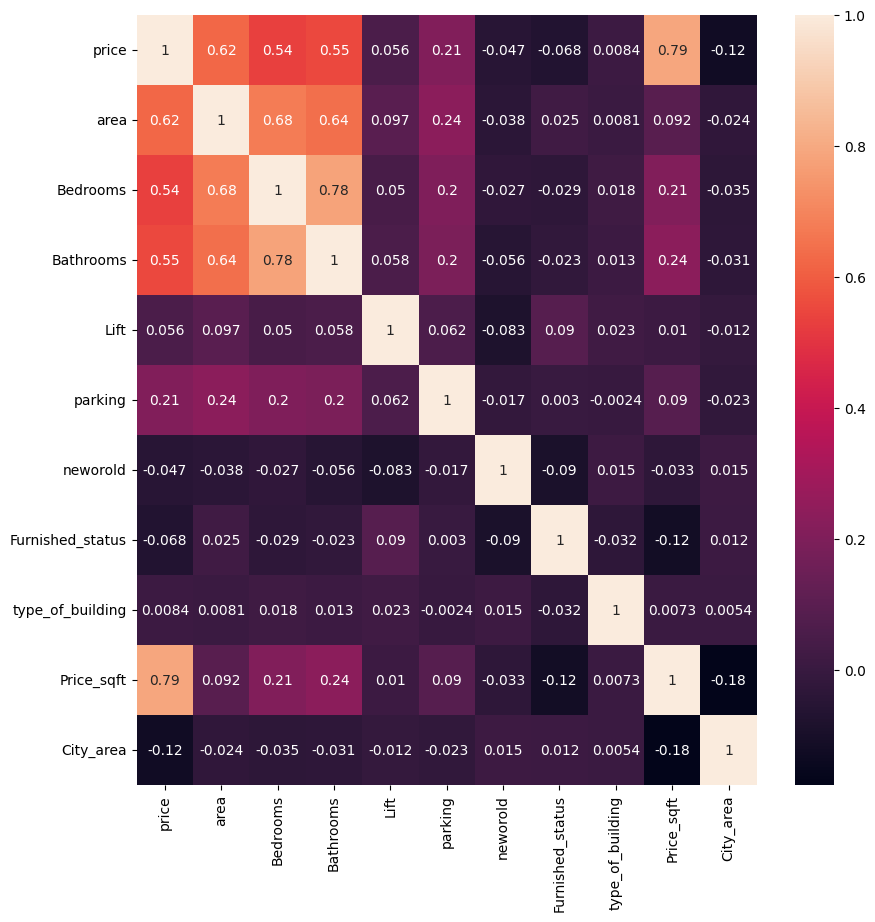

In [1772]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sns.heatmap(df1.corr(),annot=True)

In [1773]:
X_train.tail(10)

,area,Bedrooms,Bathrooms,Lift,parking,neworold,Furnished_status,type_of_building,Price_sqft,City_area
1950,840.0,3.0,2.0,2.0,1.0,1,2,0,30952.380952,1
181,1296.0,3.0,3.0,2.0,1.0,1,0,0,13888.888889,3
3320,700.0,2.0,2.0,2.0,1.0,1,2,0,31428.571429,16
3586,1000.0,2.0,2.0,2.0,1.0,1,2,0,23000.000000,9
3878,865.0,2.0,2.0,2.0,1.0,1,2,0,9248.554913,25
4953,1100.0,2.0,2.0,2.0,1.0,1,2,0,7454.545455,4
597,761.0,2.0,2.0,2.0,1.0,0,1,0,29566.360053,7
3501,977.0,2.0,2.0,2.0,1.0,0,2,0,6345.957011,37
4235,930.0,2.0,2.0,2.0,1.0,1,0,0,30107.526882,9
1041,792.0,2.0,2.0,2.0,1.0,1,2,0,11363.636364,10


In [1774]:
y_train.tail(10)

1950    26000000.0
181     18000000.0
3320    22000000.0
3586    23000000.0
3878     8000000.0
4953     8200000.0
597     22500000.0
3501     6200000.0
4235    28000000.0
1041     9000000.0
Name: price, dtype: float64

In [1728]:
#850.0	2.0	2.0	1.0	2.0	1.0	1	1	1	18235.294118	7

In [1775]:
test_inputs2 = np.array([1296, 3.0, 3.0, 2.0, 1.0, 1, 0, 0, 13888, 3],dtype='object').reshape(1,10)

In [1776]:
test_inputs2

array([[1296, 3.0, 3.0, 2.0, 1.0, 1, 0, 0, 13888, 3]], dtype=object)

In [1777]:
pipe.predict(test_inputs2)

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([20059044.96939267])

In [1778]:
import pickle

pickle.dump(pipe,open('pipe4.pkl','wb'))

In [ ]:
['New Property', 'Resale']

['Furnished', 'Semi-Furnished', 'Unfurnished']

['Ambernath', 'Andheri', 'Bandra', 'Bhandup', 'Bhayandar',
       'Borivali', 'Byculla', 'Chembur', 'Chinchpokli', 'Dadar',
       'Dahisar', 'Ghatkopar', 'Goregaon', 'Govandi', 'Jogeshwari',
       'Kalyan', 'Kandivali', 'Kanjurmarg', 'Khar', 'Kurla',
       'Lower Parel', 'Mahim', 'Malad', 'Matunga', 'Mazgaon', 'Mira Road',
       'Mulund', 'Mumbai Central', 'Nahur', 'Naigaon', 'Nalasopara',
       'Navi Mumbai', 'Parel', 'Powai', 'Santacruz', 'Sewri', 'Sion',
       'Thane', 'Tilak Nagar - Harbour Line', 'Ulhasnagar', 'Vasai',
       'Vikhroli', 'Vile Parle', 'Virar']

['Flat', 'Individual House']

In [76]:
Station = {'Ambernath': 1, 'Andheri': 2 , 'Bandra': 3, 'Bhandup': 4, 'Bhayandar': 5,
       'Borivali': 6, 'Byculla': 7, 'Chembur': 8, 'Chinchpokli': 9, 'Dadar': 10,
       'Dahisar': 11, 'Ghatkopar': 12, 'Goregaon': 13, 'Govandi': 14, 'Jogeshwari': 15,
       'Kalyan': 16, 'Kandivali': 17, 'Kanjurmarg': 18, 'Khar': 19, 'Kurla': 20,
       'Lower Parel': 21, 'Mahim': 22, 'Malad': 23, 'Matunga': 24, 'Mazgaon': 25, 'Mira Road': 26,
       'Mulund': 27, 'Mumbai Central': 28, 'Nahur': 29, 'Naigaon': 30, 'Nalasopara': 31,
       'Navi Mumbai': 32, 'Parel': 33, 'Powai': 34, 'Santacruz': 35, 'Sewri': 36, 'Sion': 37,
       'Thane': 38, 'Tilak Nagar - Harbour Line': 39, 'Ulhasnagar': 40, 'Vasai': 41,
       'Vikhroli': 42, 'Vile Parle': 43, 'Virar': 44}

In [80]:
list(Station.values())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44]

In [544]:
df1.skew()

price               1.779442
area                1.493147
Bedrooms            1.380544
Bathrooms           1.657136
Lift               -0.480347
parking             3.787351
Furnished_status   -1.079515
Price_sqft          0.782448
City_area           0.288902
dtype: float64

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Price_sqft', ylabel='Density'>

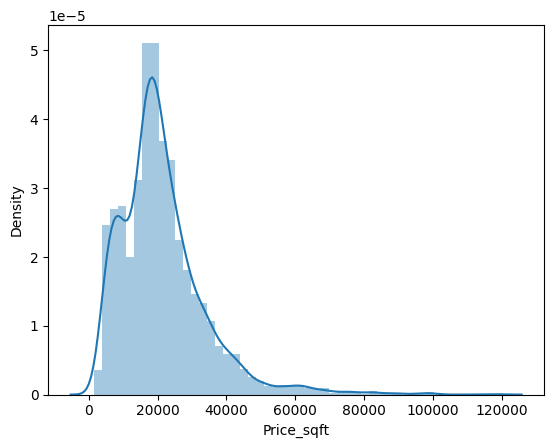

In [523]:
sns.distplot(df['Price_sqft'])

In [1]:
property_type = '{"New Property": 0, "Resale": 1}'

In [2]:
import json

In [3]:
parsed2 = json.loads(property_type)

In [4]:
parsed2

{'New Property': 0, 'Resale': 1}

In [5]:
Station1 = parsed2.keys()

In [7]:
#parsed2.get(Station1)